# TITANIC DATASET

In [1]:
import pandas as  pd
import  numpy as  np
import seaborn as  sns

In [2]:
path =  r"C:\Users\admin\Downloads\train_titanic.csv"

In [3]:
df  =  pd.read_csv(path)

# basic checks and quality checks

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Cabin'].value_counts().sort_values(ascending= False)

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

# seperate  x  &y

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
x  =  df.drop(["Survived","Name" ,'PassengerId'] , axis  =  1)
y  =  df['Survived']

In [13]:
x.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### seperate categorical & numerical data

In [14]:
cat=   x.columns[x.dtypes  =='object']
cat

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
cat1  =   ['Cabin']
cat2  =   ['Sex', 'Ticket', 'Embarked']
num  =  x.columns[x.dtypes  != 'object']


In [16]:
cat1
cat2
num

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

### create pipeline

In [17]:
from  sklearn.preprocessing import  OrdinalEncoder , StandardScaler
from  sklearn.compose import  ColumnTransformer 
from  sklearn.impute import  SimpleImputer
from sklearn.pipeline  import Pipeline

In [18]:
num_pipeline  =  Pipeline(steps =[('imputer' , SimpleImputer(strategy= 'mean')) ,  
                                  ('scaler' ,  StandardScaler())])
cat1_pipeline  =   Pipeline(steps  =   [('imputer' ,  SimpleImputer(strategy='constant' ,
                                                                     fill_value = "Not_Avail")) ,  
                                       ('encoder' ,  OrdinalEncoder())])
cat2_pipeline  =  Pipeline(steps  =   [('imputer' ,  SimpleImputer(strategy  =  'most_frequent')),  
                                       ('encoder' ,  OrdinalEncoder())])

In [19]:
pre  =  ColumnTransformer([('cat1' ,  cat1_pipeline  ,  cat1) , 
                           ('cat2' ,  cat2_pipeline  ,  cat2) ,
                            ('num' , num_pipeline,  num ) ] )

In [20]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'Not_Avail'


In [21]:
x_scaled  =   pre.fit_transform(x)

In [22]:
x_scaled

array([[ 1.46000000e+02,  1.00000000e+00,  5.23000000e+02, ...,
         4.32793366e-01, -4.73673609e-01, -5.02445171e-01],
       [ 8.10000000e+01,  0.00000000e+00,  5.96000000e+02, ...,
         4.32793366e-01, -4.73673609e-01,  7.86845294e-01],
       [ 1.46000000e+02,  0.00000000e+00,  6.69000000e+02, ...,
        -4.74545196e-01, -4.73673609e-01, -4.88854258e-01],
       ...,
       [ 1.46000000e+02,  0.00000000e+00,  6.75000000e+02, ...,
         4.32793366e-01,  2.00893337e+00, -1.76263239e-01],
       [ 6.00000000e+01,  1.00000000e+00,  8.00000000e+00, ...,
        -4.74545196e-01, -4.73673609e-01, -4.43810379e-02],
       [ 1.46000000e+02,  1.00000000e+00,  4.66000000e+02, ...,
        -4.74545196e-01, -4.73673609e-01, -4.92377828e-01]],
      shape=(891, 9))

In [23]:
x_scaled  = pd.DataFrame(x_scaled  ,  columns  =  pre.get_feature_names_out())

In [24]:
x_scaled.head()

,cat1__Cabin,cat2__Sex,cat2__Ticket,cat2__Embarked,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare
0,146.0,1.0,523.0,2.0,0.827377,-0.592481,0.432793,-0.473674,-0.502445
1,81.0,0.0,596.0,0.0,-1.566107,0.638789,0.432793,-0.473674,0.786845
2,146.0,0.0,669.0,2.0,0.827377,-0.284663,-0.474545,-0.473674,-0.488854
3,55.0,0.0,49.0,2.0,-1.566107,0.407926,0.432793,-0.473674,0.420730
4,146.0,1.0,472.0,2.0,0.827377,0.407926,-0.474545,-0.473674,-0.486337


### train test  split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train  , x_test  ,  y_train  , y_test =   train_test_split(x_scaled  , y , random_state  =  23 , test_size  =0.2)

In [27]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  ,  y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


# model  fitting

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model  =  RandomForestClassifier( n_estimators= 50  ,  max_depth  =  10 ,  min_samples_split= 15)

In [30]:
model.fit(x_train  , y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,10
,min_samples_split,15
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
model.score(x_train  , y_train)

0.9101123595505618

In [32]:
model.score(x_test ,  y_test)

0.8379888268156425

In [33]:
y_train.value_counts()

Survived
0    434
1    278
Name: count, dtype: int64

In [34]:
from  sklearn.metrics  import classification_report , confusion_matrix

### training evaluation

In [35]:
y_train_pred =  model.predict(x_train)

In [36]:
print(classification_report(y_train  ,  y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       434
           1       0.94      0.82      0.88       278

    accuracy                           0.91       712
   macro avg       0.92      0.89      0.90       712
weighted avg       0.91      0.91      0.91       712



In [37]:
cf =  confusion_matrix(y_train  , y_train_pred)

In [38]:
import seaborn as  sns

<Axes: >

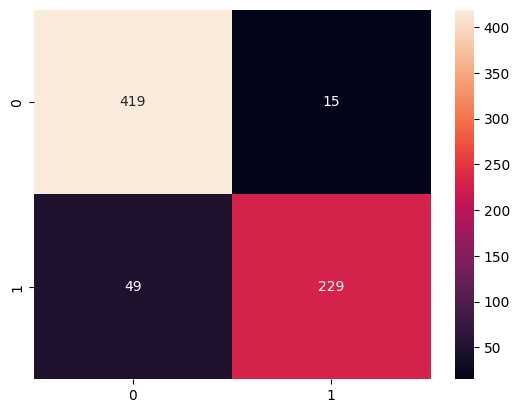

In [39]:
sns.heatmap(cf  , annot  =  True  ,  fmt  = 'd')

### testing evaluation

In [40]:
y_test_pred  =  model.predict(x_test)

In [41]:
print(classification_report(y_test  , y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       115
           1       0.83      0.69      0.75        64

    accuracy                           0.84       179
   macro avg       0.84      0.80      0.82       179
weighted avg       0.84      0.84      0.83       179



###  hyper parameter tunning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
para  =  {"n_estimators" : [50 , 55, 60 , 65,  70],
          "criterion" : ['ginni' ,  'entropy'] , 
          "max_depth" :  range(2 , 11)
          }

In [44]:
RF  =  RandomForestClassifier()

In [45]:
gscv  =   GridSearchCV( estimator= RF  ,  cv  =  5  , scoring  = 'f1_macro' , param_grid  =  para )

In [46]:
gscv.fit(x_train ,  y_train)

d:\ML_30_July_weekday\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "d:\ML_30_July_weekday\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\ML_30_July_weekday\repository\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "d:\ML_30_July_weekday\repository\venv\Lib\site-packag

,estimator,RandomForestClassifier()
,param_grid,"{'criterion': ['ginni', 'entropy'], 'max_depth': range(2, 11), 'n_estimators': [50, 55, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,55


In [47]:
gscv.score(x_train , y_train)

0.9565216475785582

In [48]:
gscv.score(x_test ,  y_test)

0.7869047619047619

In [49]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 55}

In [50]:
gscv_y_train_pred = gscv.predict(x_train)
gscv_y_test_pred =  gscv.predict(x_test)

In [52]:
# training report
print(classification_report(y_train  ,  gscv_y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       434
           1       0.99      0.91      0.95       278

    accuracy                           0.96       712
   macro avg       0.97      0.95      0.96       712
weighted avg       0.96      0.96      0.96       712



In [53]:
cf  =  confusion_matrix(y_train , gscv_y_train_pred)

<Axes: >

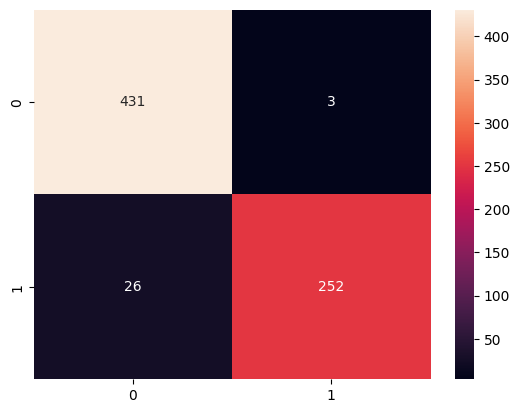

In [54]:
sns.heatmap(cf  , annot =  True  ,  fmt  = 'd')

In [55]:
# testing evaluation
print(classification_report(y_test  , gscv_y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       115
           1       0.77      0.67      0.72        64

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



<Axes: >

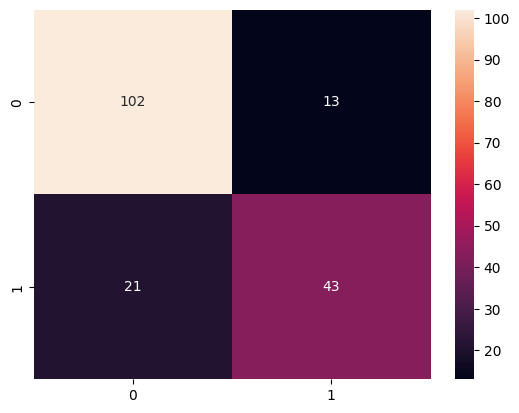

In [56]:
cfm  =  confusion_matrix(y_test  ,  gscv_y_test_pred)
sns.heatmap(cfm ,  annot  = True  ,  fmt  = 'd')

### Gradient boosting

In [57]:
from sklearn.ensemble import  GradientBoostingClassifier

In [ ]:
gb =  GradientBoostingClassifier()

In [59]:
gb.fit(x_train  ,  y_train )

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [60]:
gb.score(x_train  ,  y_train)

0.9241573033707865

In [61]:
gb.score(x_test  ,  y_test)

0.8044692737430168

In [62]:
gb_train =  gb.predict(x_train)
gb_test   =  gb.predict(x_test)

#### Training evelaution

In [63]:
print(classification_report(y_train  ,  gb_train))
print(confusion_matrix(y_train ,  gb_train))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       434
           1       0.93      0.87      0.90       278

    accuracy                           0.92       712
   macro avg       0.93      0.91      0.92       712
weighted avg       0.92      0.92      0.92       712

[[417  17]
 [ 37 241]]


#### testing evalation

In [64]:
print(classification_report(y_test  , gb_test))
print(confusion_matrix(y_test ,  gb_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       115
           1       0.77      0.64      0.70        64

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.80       179

[[103  12]
 [ 23  41]]


### XGB

In [65]:
%pip install  xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   -- ------------------------------------- 2.9/56.8 MB 13.9 MB/s eta 0:00:04
   ---- ----------------------------------- 6.0/56.8 MB 13.1 MB/s eta 0:00:04
   ------ --------------------------------- 8.9/56.8 MB 13.0 MB/s eta 0:00:04
   -------- ------------------------------- 11.5/56.8 MB 12.9 MB/s eta 0:00:04
   --------- ------------------------------ 14.2/56.8 MB 12.8 MB/s eta 0:00:04
   ----------- ---------------------------- 16.8/56.8 MB 12.7 MB/s eta 0:00:04
   ------------- -------------------------- 19.4/56.8 MB 12.6 MB/s eta 0:00:03
   --------------- ------------------------ 22.0/56.8 MB 12.5 MB/s eta 0:00:03
   ----------------- ---------------------- 24.6/56.8 MB 12.5 MB/s eta 0:00:03
   ------------------- -------------------- 27.0/56.8 MB 12.5 MB/s eta 0:00:03
   --------------------- ------------------ 29.9/56.8 MB 12.5 MB/s eta 0:00:03
   ---------------------- ----------------- 32.5/56.8 MB 12.4 MB


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from  xgboost import XGBClassifier
xgb  =  XGBClassifier( n_estimators =  100 ,  max_depth  =  10 ,  )

In [67]:
xgb.fit(x_train , y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [68]:
xgb.score(x_train ,  y_train)

0.9971910112359551

In [69]:
xgb.score(x_test  , y_test)

0.8100558659217877

In [70]:
xgb_train  = xgb.predict(x_train)
xgb_test  =  xgb.predict(x_test)

In [71]:
print(classification_report(y_train  , xgb_train ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      0.99      1.00       278

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



In [72]:
print(confusion_matrix(y_train  ,  xgb_train))

[[434   0]
 [  2 276]]


##### testing

In [73]:
print(classification_report(y_test , xgb_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       115
           1       0.72      0.77      0.74        64

    accuracy                           0.81       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [75]:
print(confusion_matrix(y_test  ,  xgb_test))

[[96 19]
 [15 49]]


In [89]:
param_grid  =  {'n_estimators' : [100  , 200] , 
                'max_depth'  :range(2 , 15), 
                'learning_rate' : [0.01 , 0.1  ,  0.2]}

In [90]:
xgb1  = XGBClassifier()
xgcv  =  GridSearchCV(xgb1  ,  param_grid  = param_grid , cv = 5 )


In [91]:
xgcv.fit(x_train  , y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': range(2, 15), 'n_estimators': [100, 200]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [92]:
xgcv.score(x_train  , y_train)

0.8707865168539326

In [93]:
xgcv.score(x_test  ,  y_test)

0.8044692737430168

In [94]:
xgcv.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

### unseen data

In [76]:
sample  =  pd.read_csv(r"C:\Users\admin\Downloads\test_titanic.csv")

In [77]:
pre

,transformers,"[('cat1', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,'Not_Avail'


In [79]:
sample.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
sample.shape

(418, 11)

In [82]:
sample.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
sample.PassengerId.value_counts()

PassengerId
892     1
893     1
894     1
895     1
896     1
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: count, Length: 418, dtype: int64

In [84]:
sample_scaled  = pre.fit_transform(sample)

In [85]:
sample_scaled  =  pd.DataFrame(sample_scaled   , columns = pre.get_feature_names_out())

## prediction

In [87]:
target_pred=  xgb.predict(sample_scaled)

In [88]:
target_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,